In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os


In [12]:
DATA_DIR = "../data/PlantVillage" 
IMG_SIZE = (256, 256)              # Resize images to 256x256
BATCH_SIZE = 32                    # Batch size
AUTOTUNE = tf.data.AUTOTUNE 
class_names = os.listdir(DATA_DIR)
print(f"Classes: {class_names}")  

Classes: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus']


In [3]:
dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='int',
    image_size=(256, 256),
    batch_size=32,
    shuffle=True,
    seed=42
)

Found 20638 files belonging to 15 classes.


### Split the dataset into 80% train, 10% test and 10% validation

In [4]:
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

In [7]:
train_ds = dataset.take(train_size)
val_ds = dataset.skip(train_size).take(val_size)
test_ds = dataset.skip(train_size + val_size).take(test_size)

In [8]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))


516
64
65


In [9]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.1)
])

In [10]:
def preprocess(image, label, augment=False):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0, 1]
    if augment:
        image = data_augmentation(image)        # Apply augmentation
    return image, label


In [13]:
train_ds = train_ds.map(lambda x, y: preprocess(x, y, augment=True), num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(lambda x, y: preprocess(x, y), num_parallel_calls=AUTOTUNE)
test_ds = test_ds.map(lambda x, y: preprocess(x, y), num_parallel_calls=AUTOTUNE)


In [14]:
def visualize_dataset(dataset, title, augmentation_applied=False):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):  # Take one batch
        for i in range(9):  # Display 9 images
            plt.subplot(3, 3, i+1)
            plt.imshow(images[i].numpy())
            plt.title(f"{class_names[labels[i]]} (Augmented)" if augmentation_applied else class_names[labels[i]])
            plt.axis("off")
    plt.suptitle(title)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


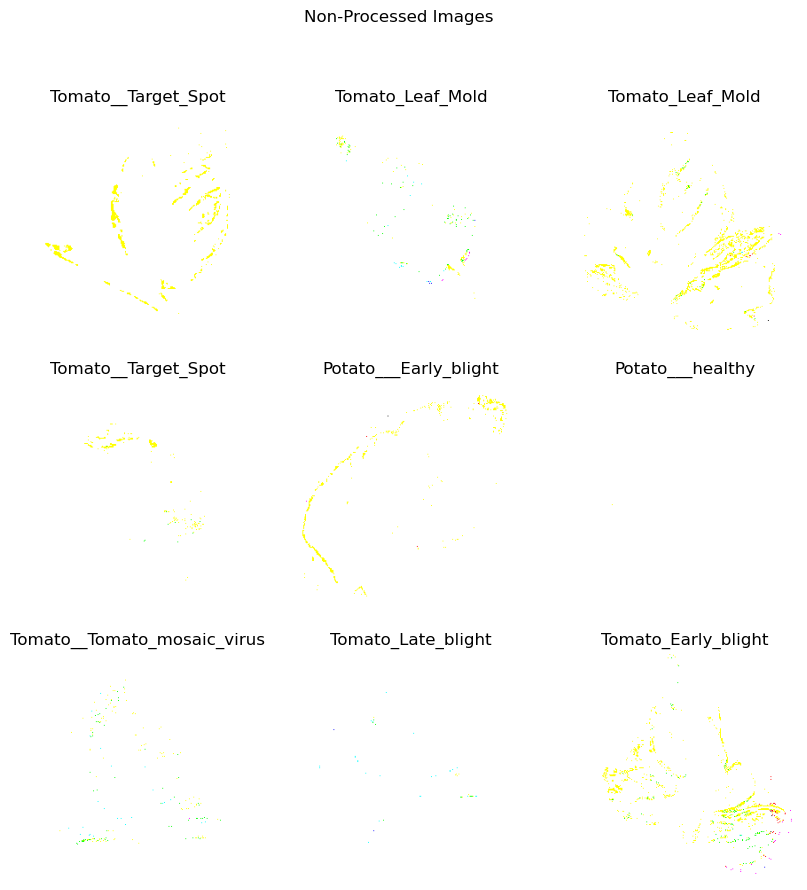

In [20]:
visualize_dataset(dataset.take(1), "Non-Processed Images")


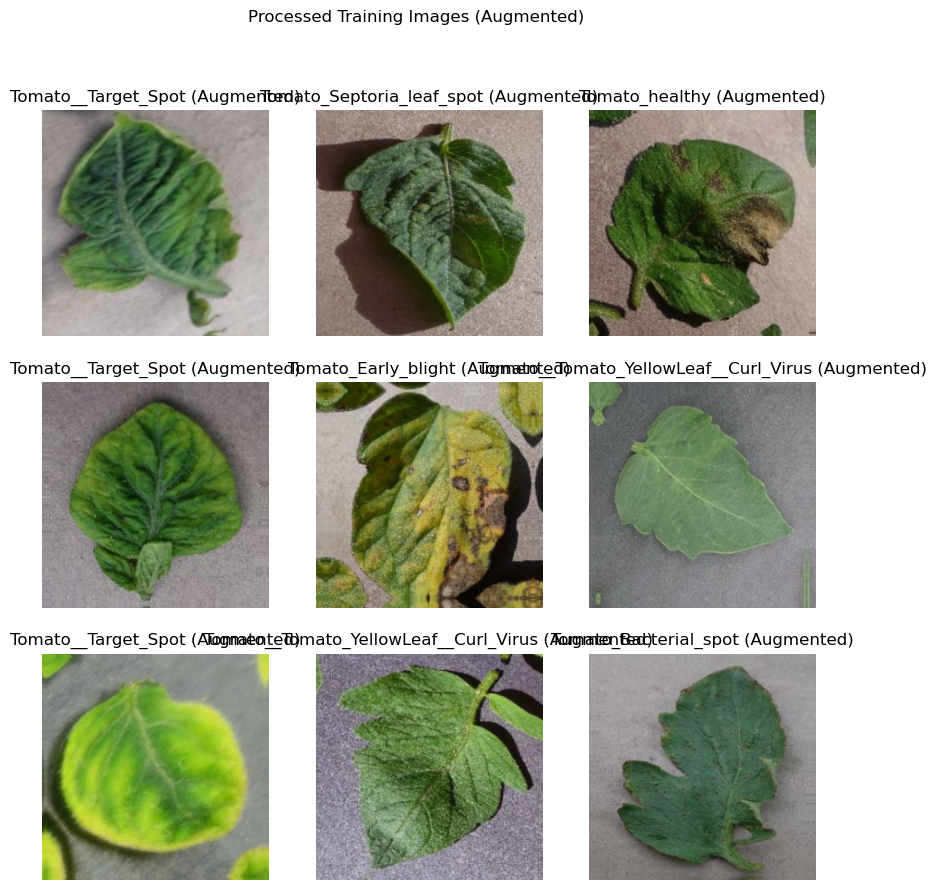

In [18]:
visualize_dataset(train_ds, "Processed Training Images (Augmented)", augmentation_applied=True)


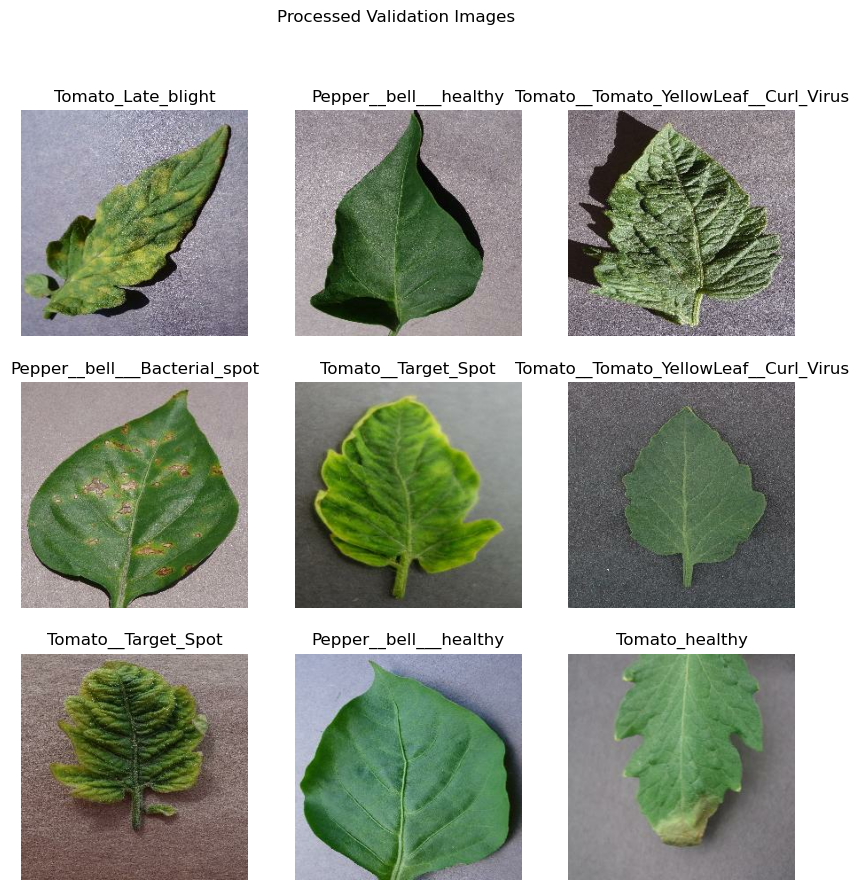

In [19]:
visualize_dataset(val_ds, "Processed Validation Images")